In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import math
import numpy as np
import arrow
import cmocean

In [3]:
%matplotlib inline

In [4]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
ds

<xarray.Dataset>
Dimensions:    (gridX: 256, gridY: 266, time: 36432)
Coordinates:
  * time       (time) datetime64[ns] 2014-09-12 2014-09-12T01:00:00 ...
  * gridY      (gridY) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * gridX      (gridX) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Data variables:
    atmpres    (time, gridY, gridX) float32 ...
    precip     (time, gridY, gridX) float32 ...
    qair       (time, gridY, gridX) float32 ...
    solar      (time, gridY, gridX) float32 ...
    tair       (time, gridY, gridX) float32 ...
    therm_rad  (time, gridY, gridX) float32 ...
    u_wind     (time, gridY, gridX) float32 ...
    v_wind     (time, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada, Environment Canada
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    coverage_content_type:     modelResult
    creator_email:             sallen@eos.ubc.ca
    creator_name: 

In [5]:
ds.time[0]

<xarray.DataArray 'time' ()>
array(1410480000000000000, dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2014-09-12
Attributes:
    _ChunkSizes:                 1
    _CoordinateAxisType:         Time
    actual_range:                [  1.41048000e+09   1.54163160e+09]
    axis:                        T
    ioos_category:               Time
    long_name:                   verification time generated by wgrib2 functi...
    reference_date:              2018.11.06 18:00:00 UTC
    reference_time:              1541527200.0
    reference_time_description:  kind of product unclear, reference date is v...
    reference_time_type:         0
    standard_name:               time
    time_origin:                 01-JAN-1970 00:00:00
    time_step:                   3600.0
    time_step_setting:           auto

In [6]:
ds.time[-1]

<xarray.DataArray 'time' ()>
array(1541631600000000000, dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-11-07T23:00:00
Attributes:
    _ChunkSizes:                 1
    _CoordinateAxisType:         Time
    actual_range:                [  1.41048000e+09   1.54163160e+09]
    axis:                        T
    ioos_category:               Time
    long_name:                   verification time generated by wgrib2 functi...
    reference_date:              2018.11.06 18:00:00 UTC
    reference_time:              1541527200.0
    reference_time_description:  kind of product unclear, reference date is v...
    reference_time_type:         0
    standard_name:               time
    time_origin:                 01-JAN-1970 00:00:00
    time_step:                   3600.0
    time_step_setting:           auto

## Slice JFM time and then converts xarray into numpy array using ".values"

In [20]:
jan2015_time = ds.time.sel(time=slice("2015-01-01","2015-01-31")).values

## Calculate percent time that january 2015 wind speeds are > 10 m/s

In [23]:
jan2015_wspd = np.sqrt(ds.u_wind.sel(time = jan2015_time)**2 + ds.v_wind.sel(time = jan2015_time)**2)

thresh = 7
wspd_size = jan2015_wspd.shape
total = wspd_size[0]

# Create numpy array for percentage value output
wspd_2D_percent = np.zeros((wspd_size[1],wspd_size[2]))
for iy in range(0,wspd_size[1]):
    for ix in range(0,wspd_size[2]):
        wspd_ts = jan2015_wspd[:,iy,ix]
        wspd_ts_thresh =  wspd_ts[wspd_ts > thresh]
        wspd_2D_percent[iy,ix] = 100 * len(wspd_ts_thresh) / total


In [24]:
total

744

In [25]:
wspd_size

(744, 266, 256)

## plot up results

Text(0,0.5,'%')

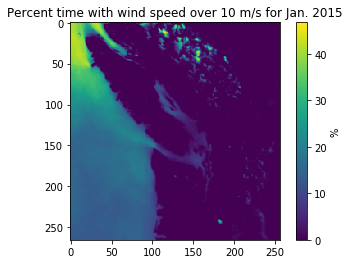

In [29]:
fig, ax = plt.subplots()
cax = ax.imshow(np.flipud(wspd_2D_percent))
ax.set_title('Percent time with wind speed over 10 m/s for Jan. 2015')
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.set_ylabel('%')

## now try to figure out how to index months by converting numeric month into text index

In [58]:
month = 1
time_01_15 = ds.time.sel(time=slice("2015-01-01","2015-01-31")).values
strmn = str(month)
strmn

'1'

In [49]:
from datetime import date
test = date(2015,1,1)
test

datetime.date(2015, 1, 1)

In [56]:
test.strftime("%y-%m-%d")

'15-01-01'

In [57]:
test.strftime("%Y-%m-%d")

'2015-01-01'

In [63]:
# old way: specify date
# jan2015_time = ds.time.sel(time=slice("2015-01-01","2015-01-31")).values

# new way: Use numeric date value (in preparation to create a loop)
t1 = date(2015,1,1)
t2 = date(2015,1,1)
time_period = ds.time.sel(time=slice(t1.strftime("%Y-%m-%d"),t2.strftime("%Y-%m-%d"))).values
time_period

array(['2015-01-01T00:00:00.000000000', '2015-01-01T01:00:00.000000000',
       '2015-01-01T02:00:00.000000000', '2015-01-01T03:00:00.000000000',
       '2015-01-01T04:00:00.000000000', '2015-01-01T05:00:00.000000000',
       '2015-01-01T06:00:00.000000000', '2015-01-01T07:00:00.000000000',
       '2015-01-01T08:00:00.000000000', '2015-01-01T09:00:00.000000000',
       '2015-01-01T10:00:00.000000000', '2015-01-01T11:00:00.000000000',
       '2015-01-01T12:00:00.000000000', '2015-01-01T13:00:00.000000000',
       '2015-01-01T14:00:00.000000000', '2015-01-01T15:00:00.000000000',
       '2015-01-01T16:00:00.000000000', '2015-01-01T17:00:00.000000000',
       '2015-01-01T18:00:00.000000000', '2015-01-01T19:00:00.000000000',
       '2015-01-01T20:00:00.000000000', '2015-01-01T21:00:00.000000000',
       '2015-01-01T22:00:00.000000000', '2015-01-01T23:00:00.000000000'], dtype='datetime64[ns]')

In [64]:
jan2015_wspd = np.sqrt(ds.u_wind.sel(time = time_period)**2 + ds.v_wind.sel(time = time_period)**2)

thresh = 7
wspd_size = jan2015_wspd.shape
total = wspd_size[0]

In [65]:
# Create numpy array for percentage value output
wspd_2D_percent = np.zeros((wspd_size[1],wspd_size[2]))
for iy in range(0,wspd_size[1]):
    for ix in range(0,wspd_size[2]):
        wspd_ts = jan2015_wspd[:,iy,ix]
        wspd_ts_thresh =  wspd_ts[wspd_ts > thresh]
        wspd_2D_percent[iy,ix] = 100 * len(wspd_ts_thresh) / total

Text(0,0.5,'%')

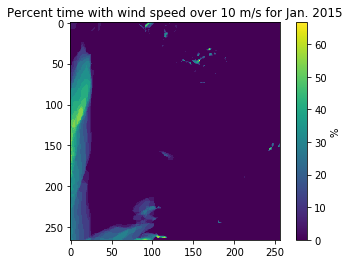

In [66]:
fig, ax = plt.subplots()
cax = ax.imshow(np.flipud(wspd_2D_percent))
ax.set_title('Percent time with wind speed over 10 m/s for Jan. 2015')
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.set_ylabel('%')